In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd


# scikit-learn modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler



# Reading the data
dataset = pd.read_csv("Dataset/maxwell.arff.csv")



x = np.array(dataset.drop(['Effort'],axis=1))
y = np.array(dataset['Effort'])

In [2]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(x)
y=np.reshape(y,(62,1))
y=scaler.fit_transform(y)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 28)


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

regressor = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=10, random_state=0).fit(x_train, y_train.ravel())

y_pred=regressor.predict(x_test)


In [5]:
y_test

array([[0.28389663],
       [0.16567635],
       [0.0137377 ],
       [0.00337501],
       [0.0987625 ],
       [0.0050229 ],
       [0.16542283],
       [0.21259368],
       [0.09850898],
       [0.05889623],
       [0.02768139],
       [0.00602114],
       [0.08245789]])

In [6]:
y_pred=np.reshape(y_pred,(13,1))
y_test=np.reshape(y_test,(13,1))

In [7]:
y_test

array([[0.28389663],
       [0.16567635],
       [0.0137377 ],
       [0.00337501],
       [0.0987625 ],
       [0.0050229 ],
       [0.16542283],
       [0.21259368],
       [0.09850898],
       [0.05889623],
       [0.02768139],
       [0.00602114],
       [0.08245789]])

In [8]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [9]:





def calculate_smape(actual, predicted) -> float:
  
    # Convert actual and predicted to numpy
    # array data type if not already
    if not all([isinstance(actual, np.ndarray), 
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual),
        np.array(predicted)
  
    return round(
        np.mean(
            np.abs(predicted - actual) / 
            ((np.abs(predicted) + np.abs(actual))/2)
        )*100, 2
    )
# RMSE (Root Mean Square Error)
mse=mean_squared_error(y_test, y_pred)
print("\nMSE:\n",mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("\nRMSE:\n",rmse)
mape=mape(y_test, y_pred)
print("\nMAPE:\n",mape)

smape = calculate_smape(y_test, y_pred)
print("\nSMAPE:\n",smape)
r2_score=1 - (1-regressor.score(x_train, y_train))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
print("\n Adj R2 score:\n",r2_score)


MSE:
 0.014412114330775409

RMSE:
 0.12005046576659088

MAPE:
 495.5852048157428

SMAPE:
 72.44

 Adj R2 score:
 0.8689304558660444


In [10]:
y_pred=scaler.inverse_transform(y_pred)

In [11]:
y_test=scaler.inverse_transform(y_test)

In [12]:
y_test=np.reshape(y_test,(13,))
y_pred=np.reshape(y_pred,(13,))

In [13]:
dfr=pd.DataFrame({'Actual Effort':y_test, 'Predicted Effort':y_pred})
print(dfr)

    Actual Effort  Predicted Effort
0         18500.0           40731.0
1         11039.0            6201.8
2          1450.0            1852.9
3           796.0            9120.2
4          6816.0            4755.8
5           900.0            5579.2
6         11023.0            7967.1
7         14000.0           24530.8
8          6800.0            9178.1
9          4300.0            3454.8
10         2330.0            3548.2
11          963.0            3079.6
12         5787.0            5105.3


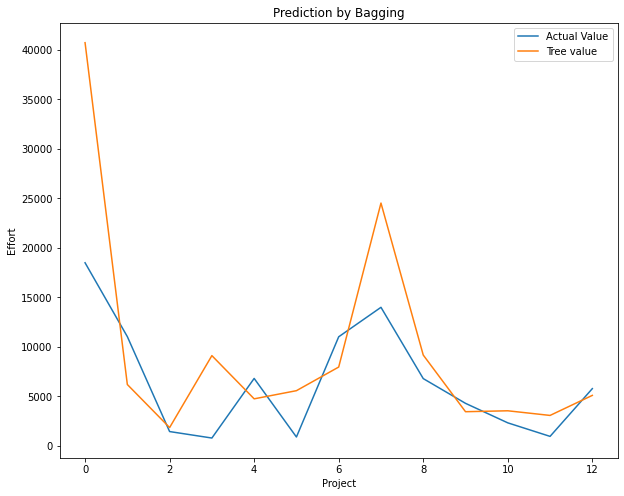

In [14]:
#Predicted vs Actual Close Value 
from matplotlib import pyplot as plt 
plt.figure(figsize=(10,8))
plt.plot(y_test, label="Actual Value")
plt.plot(y_pred, label="Tree value")
plt.title("Prediction by Bagging")
plt.xlabel("Project")
plt.ylabel("Effort")
plt.legend()
plt.show()